<a href="https://colab.research.google.com/github/yshan9/deep_learning/blob/master/ML_HW4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Overview" data-toc-modified-id="Overview-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Overview</a></span></li><li><span><a href="#Notebook-Configuration" data-toc-modified-id="Notebook-Configuration-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Notebook Configuration</a></span><ul class="toc-item"><li><span><a href="#Google-drive" data-toc-modified-id="Google-drive-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Google drive</a></span></li><li><span><a href="#Warning" data-toc-modified-id="Warning-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Warning</a></span></li><li><span><a href="#Matplotlib" data-toc-modified-id="Matplotlib-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Matplotlib</a></span></li><li><span><a href="#TensorFlow" data-toc-modified-id="TensorFlow-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>TensorFlow</a></span></li><li><span><a href="#Random-seed" data-toc-modified-id="Random-seed-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Random seed</a></span></li></ul></li><li><span><a href="#Data-Preprocessing" data-toc-modified-id="Data-Preprocessing-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Data Preprocessing</a></span></li><li><span><a href="#Training" data-toc-modified-id="Training-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Training</a></span></li><li><span><a href="#Testing-the-Best-Model" data-toc-modified-id="Testing-the-Best-Model-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Testing the Best Model</a></span></li></ul></div>

<b>
<p>
<center>
<font size="5">
Popular Machine Learning Methods: Idea, Practice and Math
</font>
</center>
</p>

<p>
<center>
<font size="4">
Part 3, Chapter 2, Section 2: Training Deep Neural Networks
</font>
</center>
</p>
    
<p>
<center>
<font size="4">
Homework 4
</font>
</center>
</p>

<p>
<center>
<font size="3">
Data Science, Columbian College of Arts & Sciences, George Washington University
</font>
</center>
</p>

<p>
<center>
<font size="3">
Yuxiao Huang
</font>
</center>
</p>
</b>

# Overview

- This notebook includes homework 4 for Training Deep Neural Networks (Part 3, Chapter 2, Section 2).
- See the accompanied slides in our [github repository](https://github.com/yuxiaohuang/teaching/tree/master/gwu/machine_learning_I/fall_2020/slides/p3_deep_learning/p3_c2_supervised_learning/p3_c2_s2_training_deep_neural_networks).
- Here we will work on TensorFlow Dataset [cifar10](https://www.tensorflow.org/datasets/catalog/cifar10).
- The goal of this homework is tweaking the pipeline (including data preprocessing, building, compiling and training DNNs) implemented in [/p3 c2 s2 training_deep_neural_networks/case_study](https://github.com/yuxiaohuang/teaching/blob/master/gwu/machine_learning_I/fall_2020/code/p3_deep_learning/p3_c2_supervised_learning/p3_c2_s2_training_deep_neural_networks/case_study/case_study.ipynb) to make it work for the new dataset mentioned above.
- Complete the missing parts indicated by # Implement me.
- Particularly, the code should
    - be bug-free (note that the output produced by your solution may not necessarily be the same as the provided output, due to version issues)
    - be commented
- **Marks will be deducted if the above requirements (for the code) are not met**.
- Submit an ipynb file named homework_4.ipynb to [blackboard](https://blackboard.gwu.edu) folder /Assignments/Homework_4/.

# Notebook Configuration

## Google drive

In [41]:
from google.colab import drive
import sys

# Mount Google Drive
drive.mount('/content/drive')

# Get the absolute path of the current folder
abspath_curr = '/content/drive/My Drive/Colab Notebooks/code/'

# Get the absolute path of the deep utilities folder
abspath_util_deep = '/content/drive/My Drive/Colab Notebooks/code/utilities/p3_deep_learning/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Warning

In [42]:
import warnings

# Ignore warnings
warnings.filterwarnings('ignore')

## Matplotlib

In [43]:
import matplotlib.pyplot as plt
%matplotlib inline 

# Set matplotlib sizes
plt.rc('font', size=20)
plt.rc('axes', titlesize=20)
plt.rc('axes', labelsize=20)
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
plt.rc('legend', fontsize=20)
plt.rc('figure', titlesize=20)

## TensorFlow

In [44]:
# The magic below allows us to use tensorflow version 2.x
%tensorflow_version 2.x 
import tensorflow as tf
from tensorflow import keras

## Random seed

In [45]:
# The random seed
random_seed = 42

# Set random seed in tensorflow
tf.random.set_seed(random_seed)

# Set random seed in numpy
import numpy as np
np.random.seed(random_seed)

# Data Preprocessing

In [46]:
# Change working directory to the absolute path of the deep utilities folder
%cd $abspath_util_deep

# Import the deep utitilities
%run pmlm_utilities_deep.ipynb

/content/drive/My Drive/Colab Notebooks/code/utilities/p3_deep_learning


Loading the data¶
In this code example, we will work on the CIFAR10 dataset.

Creating the directory for the data

In [47]:
import os

# Make directory
directory = os.path.dirname(abspath_curr + '/code/cifar-10-batches-py/')
if not os.path.exists(directory):
    os.makedirs(directory)

Downloading the data to the directory

In [48]:
import tensorflow_datasets as tfds

# Get the name of the data
data_name = 'cifar10'

# Load data
data, info = tfds.load(name=data_name,
                       data_dir=abspath_curr + '/code/cifar-10-batches-py/',
                       as_supervised=True,
                       with_info=True)

In [49]:
target = 'label'

In [50]:
# Print the splits
info.splits

{'test': <tfds.core.SplitInfo num_examples=10000>,
 'train': <tfds.core.SplitInfo num_examples=50000>}

In [51]:
# Get the classes
classes = info.features['label'].names

# Print the classes
classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [52]:
# Get the number of classes
n_classes = info.features['label'].num_classes

# Print the number of classes
info.features['label'].num_classes

10

Getting the training, validation and test data

In [53]:
# Set the training, validation and test split
split_train, split_valid, split_test = 'train[:70%]', 'train[70%:]', 'test'

# Get the training data
data_train = tfds.load(name=data_name,
                       split=split_train,
                       data_dir=abspath_curr + '/code/cifar-10-batches-py/',
                       as_supervised=True)

# Get the validation data
data_valid = tfds.load(name=data_name,
                       split=split_valid,
                       data_dir=abspath_curr + '/code/cifar-10-batches-py/',
                       as_supervised=True)

# Get the test data
data_test = tfds.load(name=data_name,
                      split=split_test,
                      data_dir=abspath_curr + '/code/cifar-10-batches-py/',
                      as_supervised=True)

Normalizing the data

In [54]:
# Call preprocess
# See the implementation in pmlm_utilities_deep.ipynb

# Normalize the training data
data_train = data_train.map(normalize)

# Normalize the validation data
data_valid = data_valid.map(normalize)

# Normalize the test data
data_test = data_test.map(normalize)

Shuffling, batching and prefetching the data

In [55]:
# Shuffling the training data
data_train = data_train.shuffle(buffer_size=1000, seed=42)

# Set the batch size
batch_size = 16

# Batch and prefetch the training data
data_train = data_train.batch(batch_size).prefetch(1)

# Batch and prefetch the validation data
data_valid = data_valid.batch(batch_size).prefetch(1)

# Batch and prefetch the test data
data_test = data_test.batch(batch_size).prefetch(1)

# Training

Creating the directory for the saved model

In [56]:
# Make directory
directory = os.path.dirname(abspath_curr + '/hw4cifar-result/model/')
if not os.path.exists(directory):
    os.makedirs(directory)

Build the model

In [57]:
# A sequential dnn
model = keras.models.Sequential()

# Add the input layer
model.add(keras.layers.Flatten(input_shape=[32, 32,3]))
# Add bn layer
model.add(keras.layers.BatchNormalization())

# Add the first hidden layer
model.add(keras.layers.Dense(50, activation='relu'))
# Add bn layer
model.add(keras.layers.BatchNormalization())

# Add the second hidden layer
model.add(keras.layers.Dense(50, activation='relu'))
# Add bn layer
model.add(keras.layers.BatchNormalization())

# Add the output layer
model.add(keras.layers.Dense(10, activation='softmax'))

# The model summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 3072)              0         
_________________________________________________________________
batch_normalization_6 (Batch (None, 3072)              12288     
_________________________________________________________________
dense_6 (Dense)              (None, 50)                153650    
_________________________________________________________________
batch_normalization_7 (Batch (None, 50)                200       
_________________________________________________________________
dense_7 (Dense)              (None, 50)                2550      
_________________________________________________________________
batch_normalization_8 (Batch (None, 50)                200       
_________________________________________________________________
dense_8 (Dense)              (None, 10)               

Compiling the model

In [58]:
# Compile the model
model.compile(optimizer=keras.optimizers.SGD(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Training the model

Setting callbacks

In [59]:
# ModelCheckpoint callback
model_checkpoint_cb = keras.callbacks.ModelCheckpoint(filepath=abspath_curr + '/hw4cifar-result/model/model.h5',
                                                      save_best_only=True,
                                                      save_weights_only=True)

# EarlyStopping callback
early_stopping_cb = keras.callbacks.EarlyStopping(patience=5,
                                                  restore_best_weights=True)

# ReduceLROnPlateau callback
reduce_lr_on_plateau_cb = keras.callbacks.ReduceLROnPlateau(
    factor=0.1,
    patience=5)

Training, evaluating and saving the best model

In [60]:
# Train, evaluate and save the best model
history = model.fit(data_train,
                    epochs=10,
                    validation_data=data_valid,
                    callbacks=[model_checkpoint_cb,
                               early_stopping_cb,
                               reduce_lr_on_plateau_cb])

Epoch 1/10
2188/2188 [==============================] - 16s 7ms/step - loss: 1.8648 - accuracy: 0.3345 - val_loss: 1.6669 - val_accuracy: 0.4114
Epoch 2/10
2188/2188 [==============================] - 11s 5ms/step - loss: 1.6988 - accuracy: 0.3952 - val_loss: 1.5848 - val_accuracy: 0.4416
Epoch 3/10
2188/2188 [==============================] - 11s 5ms/step - loss: 1.6328 - accuracy: 0.4206 - val_loss: 1.5462 - val_accuracy: 0.4519
Epoch 4/10
2188/2188 [==============================] - 11s 5ms/step - loss: 1.5886 - accuracy: 0.4373 - val_loss: 1.5161 - val_accuracy: 0.4595
Epoch 5/10
2188/2188 [==============================] - 11s 5ms/step - loss: 1.5606 - accuracy: 0.4472 - val_loss: 1.4971 - val_accuracy: 0.4737
Epoch 6/10
2188/2188 [==============================] - 11s 5ms/step - loss: 1.5394 - accuracy: 0.4580 - val_loss: 1.4791 - val_accuracy: 0.4757
Epoch 7/10
2188/2188 [==============================] - 11s 5ms/step - loss: 1.5170 - accuracy: 0.4638 - val_loss: 1.4696 - val_ac

Plotting the learning curve

Creating the directory for the figure

In [61]:
# Make directory
directory = os.path.dirname(abspath_curr + '/hw4cifar-result/figure/')
if not os.path.exists(directory):
    os.makedirs(directory)

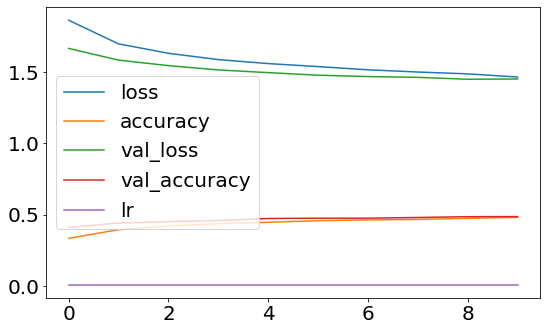

In [62]:
import pandas as pd

# Create a figure
pd.DataFrame(history.history).plot(figsize=(8, 5))

# Save and show the figure
plt.tight_layout()
plt.savefig(abspath_curr + '/hw4cifar-result/figure/learning_curve.pdf')
plt.show()

# Testing the Best Model

In [63]:
# Load the saved model
model.load_weights(filepath=abspath_curr + '/hw4cifar-result/model/model.h5')

Evaluating the model

In [64]:
loss, accuracy = model.evaluate(data_test)

625/625 [==============================] - 3s 5ms/step - loss: 1.4369 - accuracy: 0.4857
